In [ ]:
import matplotlib.pyplot as plt

# Clustering for Dataset Exploration

**How many clusters?**

You are given an array points of size 300x2, where each row gives the (x, y) co-ordinates of a point on a map. Make a scatter plot of these points, and use the scatter plot to guess how many clusters there are.

matplotlib.pyplot has already been imported as plt. In the IPython Shell:

Create an array called xs that contains the values of points[:,0] - that is, column 0 of points.
Create an array called ys that contains the values of points[:,1] - that is, column 1 of points.
Make a scatter plot by passing xs and ys to the plt.scatter() function.
Call the plt.show() function to show your plot.
How many clusters do you see?n

In [1]:
ys=points[:,1]

In [ ]:
xs=points[:,0]

In [ ]:
plt.scatter(xs,ys)

In [ ]:
plt.show()

**Clustering 2D points**

From the scatter plot of the previous exercise, you saw that the points seem to separate into 3 clusters. You'll now create a KMeans model to find 3 clusters, and fit it to the data points from the previous exercise. After the model has been fit, you'll obtain the cluster labels for some new points using the .predict() method.

You are given the array points from the previous exercise, and also an array new_points.

In [ ]:
# Import KMeans
from sklearn.cluster import KMeans 

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

**Inspect your clustering**

Let's now inspect the clustering you performed in the previous exercise!

A solution to the previous exercise has already run, so new_points is an array of points and labels is the array of their cluster labels.

In [ ]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels,alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
"""
scatter plot of centroids_x and centroids_y, using 'D' (a diamond) as a marker by specifying the marker parameter. Set the size of the markers to be 50 using s=50.
"""
plt.scatter(centroids_x,centroids_y,marker="D",s=50)
plt.show()


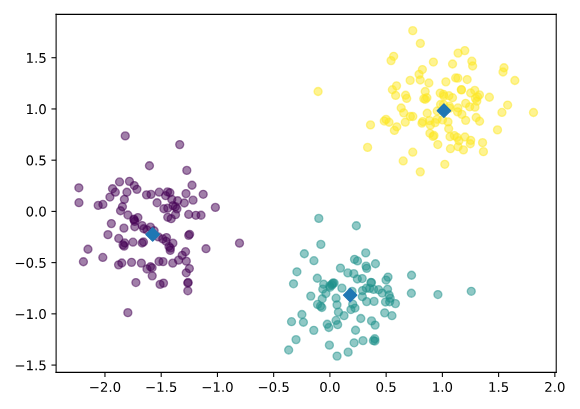

**How many clusters of grain?**

In the video, you learned how to choose a good number of clusters for a dataset using the k-means inertia graph. You are given an array samples containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

KMeans and PyPlot (plt) have already been imported for you.

In [3]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
semillas=pd.read_csv("./dataset/Grains/seeds.csv")

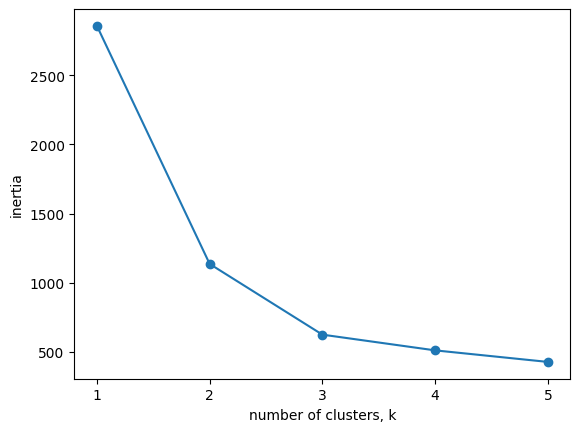

In [5]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(semillas)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [6]:
semillas.head()

,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


**Evaluating the grain clustering**

In the previous exercise, you observed from the inertia plot that 3 is a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". In this exercise, cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

You have the array samples of grain samples, and a list varieties giving the grain variety for each sample. Pandas (pd) and KMeans have already been imported for you.

In [15]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)
# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(semillas)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)


ValueError: All arrays must be of the same length

**Scaling fish data for clustering**

You are given an array samples giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, you'll need to standardize these features first. In this exercise, you'll build a pipeline to standardize and cluster the data.

In [22]:
import pandas as pd
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [23]:
pescados=pd.read_csv("./dataset/fish.csv")

In [63]:
species=pescados.iloc[:,0]
pescados.iloc[:,1:]

,242.0,23.2,25.4,30.0,38.4,13.4
0,290.0,24.0,26.3,31.2,40.0,13.8
1,340.0,23.9,26.5,31.1,39.8,15.1
2,363.0,26.3,29.0,33.5,38.0,13.3
3,430.0,26.5,29.0,34.0,36.6,15.1
4,450.0,26.8,29.7,34.7,39.2,14.2
...,...,...,...,...,...,...
79,950.0,48.3,51.7,55.1,16.2,11.2
80,1250.0,52.0,56.0,59.7,17.9,11.7
81,1600.0,56.0,60.0,64.0,15.0,9.6
82,1550.0,56.0,60.0,64.0,15.0,9.6


In [64]:
# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)

# Fit the pipeline to samples
pipeline.fit(pescados.iloc[:,1:])

# Calculate the cluster labels: labels
labels = pipeline.predict(pescados.iloc[:,1:])



In [67]:
# Crear el DataFrame con columnas 'labels' y 'species'
df = pd.DataFrame({'labels': labels, 'species': species})
df.head()

,labels,species
0,0,Bream
1,0,Bream
2,0,Bream
3,0,Bream
4,0,Bream


In [68]:
# Create crosstab: ct
ct = pd.crosstab(df["labels"],df["species"])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0           33     0      3      0
1            0     0     17     14
2            0     5      0      0
3            0    12      0      0


**Clustering stocks using KMeans**

In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array movements of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Note that Normalizer() is different to StandardScaler(), which you used in the previous exercise. While StandardScaler() standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.

In [2]:
import pandas as pd
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

In [9]:
movements=pd.read_csv("./dataset/company-stock-movements-2010-2015-incl.csv")
companies=movements.iloc[:,0].copy()
companies.head()

0               Apple
1                 AIG
2              Amazon
3    American express
4              Boeing
Name: Unnamed: 0, dtype: object

In [8]:
# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements.iloc[:,1:])


Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

In [11]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements.iloc[:,1:])

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values(by="labels"))


    labels                           companies
58       0                               Xerox
16       1                   General Electrics
45       1                                Sony
37       2                            Novartis
19       2                     GlaxoSmithKline
42       2                   Royal Dutch Shell
52       2                            Unilever
6        2            British American Tobacco
46       2                      Sanofi-Aventis
49       2                               Total
39       2                              Pfizer
44       3                        Schlumberger
35       3                            Navistar
12       3                             Chevron
10       3                      ConocoPhillips
8        3                         Caterpillar
53       3                       Valero Energy
57       3                               Exxon
9        4                   Colgate-Palmolive
28       4                           Coca Cola
56       4   